<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro-to-pgmpy-library" data-toc-modified-id="Intro-to-pgmpy-library-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro to <code>pgmpy</code> library</a></span></li><li><span><a href="#Alarm-Bayes-Network-Schema" data-toc-modified-id="Alarm-Bayes-Network-Schema-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Alarm Bayes Network Schema</a></span></li><li><span><a href="#Set-up-alarm-Bayes-Nets-using-pgmpy-library" data-toc-modified-id="Set-up-alarm-Bayes-Nets-using-pgmpy-library-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Set up alarm Bayes Nets using <code>pgmpy</code> library</a></span></li><li><span><a href="#Provide-conditional-probability-distributions-from-the-network" data-toc-modified-id="Provide-conditional-probability-distributions-from-the-network-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Provide conditional probability distributions from the network</a></span></li><li><span><a href="#Check-Bayes-Nets-model-and-probability-distributions" data-toc-modified-id="Check-Bayes-Nets-model-and-probability-distributions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Check Bayes Nets model and probability distributions</a></span></li><li><span><a href="#Make-the-inferences-using-VariableElimination-function" data-toc-modified-id="Make-the-inferences-using-VariableElimination-function-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Make the inferences using <code>VariableElimination</code> function</a></span></li><li><span><a href="#Notes" data-toc-modified-id="Notes-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Notes</a></span></li></ul></div>

### Intro to `pgmpy` library

[pgmpy](http://pgmpy.org/) is a python library for working with Probabilistic Graphical Models. This library enables users to build probabilistic graphical models and use its built-in functions to make inferences using algorithms, such as Bayes Network and Markov Network. Please refer to [this paper](https://conference.scipy.org/proceedings/scipy2015/pdfs/ankur_ankan.pdf) for a quick intro to pgmpy library.

In [2]:
# install pgmpy library
!pip install pgmpy==0.1.10

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 2.0 MB/s eta 0:00:00a 0:00:01


In [3]:
# import modules
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

### Alarm Bayes Network Schema



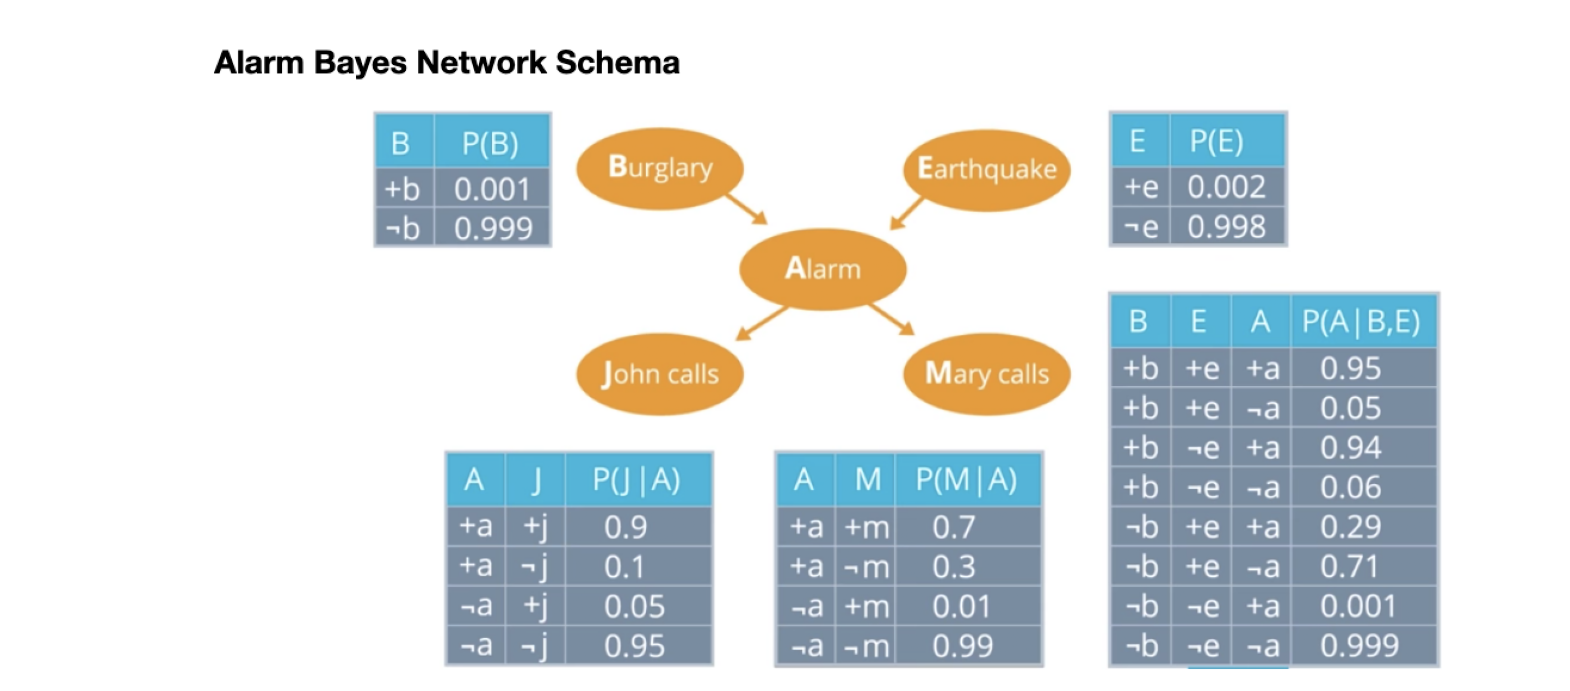

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set the figure size (width, height) in inches
fig, ax = plt.subplots(figsize=(20, 16))  # Adjust these numbers as needed

image = mpimg.imread("/Users/chaklader/PycharmProjects/part-of-speech-tagging/images/alarm_bayes_network.png")
ax.imshow(image)
ax.axis('off')  # Turn off axis labels

plt.show()

### Set up alarm Bayes Nets using `pgmpy` library

Once we imported the file, we can instantiate a `BayesianModel` to build our model as shown in the figure above.

    `AlarmNet = BayesianModel()`

Now we can add the nodes using `add_node(name)` into the model. As shown in the figure above, we will add five nodes as follows: `Burglary`, `Earthquake`, `Alarm`, `John calls`, and `Mary calls`.

    `AlarmNet.add_node("Burglary")`

Next we can connect the nodes using `add_edge()` where the nodes are connected in the graph. This function takes 2 inputs, ie. parent node and child node.
    
    `AlarmNet.add_edge("temperature","alarm")`

In [4]:
# Instantiate PGMPY's Bayesian Model
AlarmNet = BayesianModel()

# Add the nodes
AlarmNet.add_node("Burglary")
AlarmNet.add_node("Earthquake")
AlarmNet.add_node("Alarm")
AlarmNet.add_node("John calls")
AlarmNet.add_node("Mary calls")

# Connect the nodes
AlarmNet.add_edge("Burglary", "Alarm")
AlarmNet.add_edge("Earthquake", "Alarm")
AlarmNet.add_edge("Alarm", "John calls")
AlarmNet.add_edge("Alarm", "Mary calls")

### Provide conditional probability distributions from the network

Now that the graph has been set up, we can add the probability distributions by using PGMPY's `TabularCPD` function.

This function takes the following inputs:
- `variable`: the name of the node
- `variable_card`: the number of elements in the probability distribution. 2 for a binary node, ie. `True` or `False`.
- `values`: the probability distributions.
- `evidences`: the parents of the node.
- `evidence_card`: the dimensions of the probability distribution according to the number of parent nodes.

For node 'Burglary' with two possible values, where P(+B)=0.999 and P(¬B)=0.001, we can set the probability with the following command:

    cpd_burglary = TabularCPD('Burglary', 2, 
                               values=[[0.001], [0.999]])

For this conditional probability distribution of P(John calls|Alarm):

|  Burglary  |P(JohnCalls=true given Burglary)|
| ------ | ----- |
|  T   | 0.9|
|  F   | 0.05| 

the command is:

    cpd_js = TabularCPD('John calls', 2, 
                        values=[[0.95, 0.1], [ 0.05, 0.9]], 
                        evidence=['Alarm'], evidence_card=[2])

Finally, in a 3-nodes relationship where P(Alarm|Burglary, Earthquake):

| Burglary   |  Earthquake  |P(Alarm=true given Burglary and Earthquake)|
| --- | --- |:----:|
|T|T|0.95|
|T|F|0.94|
|F|T|0.29|
|F|F|0.001|

the command is:

    cpd_abc = TabularCPD('A', 2, 
                         values=[[0.999, 0.71, 0.06, 0.05], [0.001, 0.29, 0.94, 0.95]], 
                         evidence=['G', 'T'], evidence_card=[2, 2])


In [5]:
cpd_burglary = TabularCPD(variable='Burglary', 
                          variable_card=2,
                          values=[[.999], [0.001]])

cpd_earthquake = TabularCPD(variable='Earthquake', 
                            variable_card=2,
                            values=[[0.998], [0.002]])

cpd_alarm = TabularCPD(variable='Alarm', 
                       variable_card=2,
                       values=[[0.999, 0.71, 0.06, 0.05],
                               [0.001, 0.29, 0.94, 0.95]],
                       evidence=['Burglary', 'Earthquake'],
                       evidence_card=[2, 2])

cpd_johncalls = TabularCPD(variable='John calls', 
                           variable_card=2,
                           values=[[0.95, 0.1],
                                   [0.05, 0.9]],
                           evidence=['Alarm'], 
                           evidence_card=[2])

cpd_marycalls = TabularCPD(variable='Mary calls', 
                           variable_card=2,
                           values=[[0.1, 0.7], 
                                   [0.9, 0.3]],
                           evidence=['Alarm'], 
                           evidence_card=[2])

# Associate CPDs with the model structure
AlarmNet.add_cpds(cpd_burglary, 
                     cpd_earthquake, 
                     cpd_alarm, 
                     cpd_johncalls, 
                     cpd_marycalls)

### Check Bayes Nets model and probability distributions

In [ ]:
# Checking the distributions validity
AlarmNet.check_model()

In [ ]:
# Get the nodes of the model
AlarmNet.nodes()

In [ ]:
# Get the edges of the model
AlarmNet.edges()

In [ ]:
# Check the independencies of a node
AlarmNet.local_independencies('Burglary')

In [ ]:
# List all conditional independencies
AlarmNet.get_independencies()

### Make the inferences using `VariableElimination` function

1. Inference for a `marginal probability` of the "Alarm" node being True:
```
    solver = VariableElimination(AlarmNet)
    marginal_prob = solver.query(variables=['Alarm'], 
                                 joint=False)
    prob = marginal_prob['faulty alarm'].values
```
  
2. Inference for a `conditional probability`, such as P('A' = false | 'B' = true, 'C' = False)):
```
    solver = VariableElimination(AlarmNet)
    conditional_prob = solver.query(variables=['A'],
                                    evidence={'B':1,'C':0}, 
                                    joint=False)
    prob = conditional_prob['A'].values
```    

Both functions return two probabilities corresponding to `[False, True]` case. In order to get the `True` probability, we can specify `prob[1]` and `prob[0]` for `False` probability.


In [ ]:
# marginal probability of the alarm node
solver = VariableElimination(AlarmNet)
marginal_prob = solver.query(variables=['Alarm'], joint=False)
prob_alarm = marginal_prob['Alarm'].values
prob_alarm

In [ ]:
# conditional probability that the alarm will be triggered when there is a burglary, but no earthquake
solver = VariableElimination(AlarmNet)
conditional_prob_abe = solver.query(variables=['Alarm'], evidence={'Burglary':1,'Earthquake':0}, joint=False)
prob_cond = conditional_prob_abe['Alarm'].values
prob_cond

In [ ]:
# conditional probability the alarm rings when both John and Mary call
solver = VariableElimination(AlarmNet)
conditional_prob_ajm = solver.query(variables=['Alarm'], evidence={'Mary calls':1,'John calls':1}, joint=False)
prob_cond = conditional_prob_ajm['Alarm'].values
prob_cond # only take the True value

### Notes

`pgmpy's variable elimination` function sometimes does not produce accurate posterior probability distributions. It is advisable to understand the conditional relationships of the query, hidden, and evidence nodes and enumerate them.

From the example in the lecture videos, if we want to compute P(+b|+j, +m), we can enumerate them as:

        P(+b|+j, +m) = P(+b, +j, +m) / P(+j, +m)
        
        # adding the sum of hidden variables
        P(+b, +j, +m) = sum_of_e sum_of_a P(+b).P(e).P(a|+b, e).P(+j|a).P(+m|a)
        P(+j, +m)     = sum_of_e sum_of_a sum_of_b P(b).P(e).P(a|b, e).P(+j|a).P(+m|a)
        
For more examples, please refer to `pgmpy`'s [Bayes Nets notebook](https://github.com/pgmpy/pgmpy_notebook/blob/master/notebooks/2.%20Bayesian%20Networks.ipynb) on its [Github repo](https://github.com/pgmpy/pgmpy).